# 主成分分析

## 主成分分析の基礎

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.019590430670684)

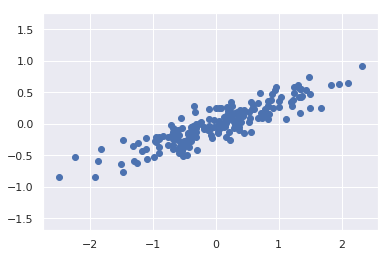

In [26]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [30]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [34]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.019590430670684)

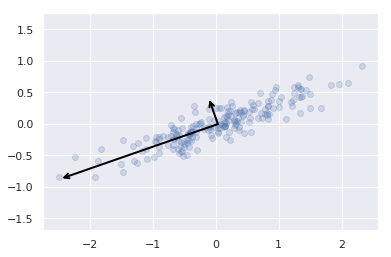

In [35]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

## PCAによる次元削除

In [36]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('original shape: ', X.shape)
print('transformedl shape: ', X_pca.shape)

original shape:  (200, 2)
transformedl shape:  (200, 1)


(-2.771528780690219, 2.661757596590678, -0.9964674432667128, 1.021908177590081)

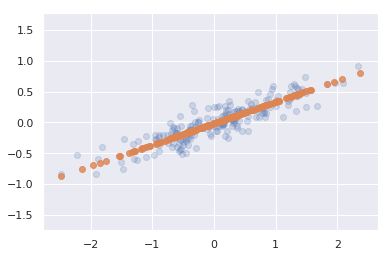

In [37]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')